<a href="https://colab.research.google.com/github/rizkyanugrah/DATMIN_POSTTEST-2/blob/main/Muhammad_Rizky_Anugrah(2109116066)_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [2]:
import pandas as pd # import
from mlxtend.frequent_patterns import apriori, association_rules #import

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/rizkyanugrah/DATMIN_POSTTEST-2/main/dataset_market_basket.csv") # df untuk membaca file dataset dengan method read_csv

In [ ]:
df # Lihat Data  item pada variavel df

In [ ]:
# 1 item set

df.sum() # hitung jumlah nilai di setiap kolom

In [ ]:
# 2 Item set
from itertools import permutations #Import Library 

#membuat perbandingan data
rules = list(permutations(df.columns, 2))
rules # untuk menampilkan keseluruhan hasil kombinasi

In [ ]:
# mengfilter data yang dimana hanya item yang ada saja yang akan terhitung

rule_baru = [] # menyimpan data dalam bentuk list
for rule in rules:
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

In [ ]:
# melihat jumlah data 2 item set
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

In [ ]:
# List support
supp = [i/len(df)*100 for i in hitung.values()]
print(supp)
print("---")
for item,support in hitung.items():
  print(f"{item} support = {round(support/len(df)*100)}%")

In [ ]:
# List Confidence
for item,ab in hitung.items():  # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  #"A->B"
  i = eval(item)#Ubah ke list dari string
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%") # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya
     

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

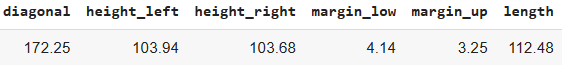
<!-- 1412 -->

### Collect and Describe Data

In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/rizkyanugrah/DATMIN_POSTTEST-2/main/deteksi_uang_palsu.csv")
df2

### Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [20]:
# Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

from sklearn.metrics.pairwise import euclidean_distances

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = euclidean_distances(df2[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']], new_data)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])


Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


### 1. Menambahkan Kolom Jarak


In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

In [ ]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

df2

### 2. Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

In [ ]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - 172.25)**2
    + (df2['height_left'] - 103.94)**2
    + (df2['height_right'] - 103.68)**2
    + (df2['margin_low'] - 4.14)**2
    + (df2['margin_up'] - 3.25)**2
    + (df2['length'] - 112.48)**2
)

# Mengurutkan data dari kecil ke besar dan menentukan data terdekat
k = int(np.sqrt(len(df2)))
data_terdekat = df2.sort_values('distance').head(k)

# Menampilkan data terdekat
print(data_terdekat)


### 3. Menentukan hasil prediksi berdasarkan label terbanyak

In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

In [ ]:
# Mengimpor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)

print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True ")
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

# (3) Analisis

> Nama : Muhammad Rizky Anugrah

> Nim : 2109116066


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

## 1.Business Understanding

### Judul : Data infeksi covid19 Indonesia
### Business Understanding

> #### Dataset `data_infeksi_covid19_indonesia.csv` adalah kumpulan data yang berisi informasi tentang kasus infeksi COVID-19 di Indonesia. Dalam konteks bisnis, dataset ini dapat memberikan wawasan tentang dampak pandemi COVID-19 terhadap sektor bisnis di Indonesia dan bagaimana perusahaan dapat mengelola risiko yang terkait dengan pandemi ini.

> #### Berikut contoh kodingan python untuk membaca dataset `data_infeksi_covid19_indonesia.csv` menggunakan library pandas dan menampilkan datanya:



## 2. Data Understanding

### Memahami struktur data dan variabel yang terkandung di dalamnya. Dataset ini berisi data tentang informasi kasus covid19. Terdapat beberapa column dalam dataset ini yaitu:

### Collect Data

In [5]:
import pandas as pd
df3 = pd.read_csv('https://raw.githubusercontent.com/rizkyanugrah/DATMIN_POSTTEST-2/main/data_infeksi_covid19_indonesia.csv')


### Describe Data

In [6]:
df3

,tanggal,jumlah_periksa,konfirmasi,sembuh,meninggal,negatif,proses_periksa,kasus_perawatan,catatan
0,2020-02-18,112,0,0,0,110,2,0.0,NaN
1,2020-02-19,114,0,0,0,112,2,0.0,NaN
2,2020-02-20,118,0,0,0,116,2,0.0,NaN
3,2020-02-21,121,0,0,0,121,0,0.0,NaN
4,2020-02-22,121,0,0,0,121,0,0.0,Tidak tersedia data/Tidak ada perubahan
...,...,...,...,...,...,...,...,...,...
100,2020-05-28,201311,24538,6240,1496,176773,0,NaN,[automated]
101,2020-05-29,205165,25216,6492,1520,179949,0,NaN,[automated]
102,2020-05-30,216769,25773,7015,1573,190996,0,NaN,[automated]
103,2020-05-31,216769,25773,7015,1573,190996,0,NaN,[automated]


### Penjelasan Setiap Column

In [ ]:
df3.info()

# tanggal: Tanggal data dilaporkan (diambil dari informasi "Data dilaporkan sampai [tanggal]" di setiap dokumen situasi terkini).
# jumlah_periksa: Jumlah kasus yang telah diperiksa / jumlah spesimen yang diterima.
# konfirmasi: Jumlah kasus yang positif COVID-19.
# sembuh: Jumlah kasus yang sembuh dari positif COVID-19.
# meninggal: Jumlah kasus yang meninggal dari positif COVID-19.
# negatif: Jumlah kasus yang negatif COVID-19.
# proses_periksa: Jumlah spesimen yang masih dalam proses pemeriksaan.
# kasus_perawatan: Jumlah kasus dalam perawatan. Informasi ini tidak tersedia pada laporan. Kolom ini dapat diabaikan.
# catatan: Informasi tambahan dari dokumen dan/atau komentar mengenai laporan data. Kolom ini dapat diabaikan.

## 3. Data preparation

### Disini kita melakukan beberapa tahapan untuk mempersiapkan data sebelum dilakukan analisis. Pada kasus ini, kita melakukan beberapa hal seperti menghapus kolom yang tidak diperlukan, mengisi nilai yang hilang dengan rata-rata,Intinya adalah cleaning data.

### Mengisi nilai yang hilang

In [20]:
# Mengisi nilai yang hilang dengan rata-rata
df3.fillna(df.mean(), inplace=True)

<ipython-input-20-a90372fcf971>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.fillna(df.mean(), inplace=True)


### Menghapus kolom tidak di perlukan

In [21]:
# Menghapus kolom yang tidak diperlukan
df3.drop(columns=["catatan"])

,tanggal,jumlah_periksa,konfirmasi,sembuh,meninggal,negatif,proses_periksa,kasus_perawatan
0,2020-02-18,112,0,0,0,110,2,0.000000
1,2020-02-19,114,0,0,0,112,2,0.000000
2,2020-02-20,118,0,0,0,116,2,0.000000
3,2020-02-21,121,0,0,0,121,0,0.000000
4,2020-02-22,121,0,0,0,121,0,0.000000
...,...,...,...,...,...,...,...,...
100,2020-05-28,201311,24538,6240,1496,176773,0,32.673469
101,2020-05-29,205165,25216,6492,1520,179949,0,32.673469
102,2020-05-30,216769,25773,7015,1573,190996,0,32.673469
103,2020-05-31,216769,25773,7015,1573,190996,0,32.673469
